In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h1><marquee>Load the data</marquee></h1>

In [2]:
df = pd.read_csv(r'C:\Users\priya\OneDrive\Desktop\greenAI\day-8\KNN\Social_Network_Ads.csv')

<h1><marquee>Encode 'Gender' (Male=1, Female=0)</marquee></h1>

In [3]:
df['Gender'] = pd.get_dummies(df['Gender'], drop_first=True)

<h1><marquee>Feature matrix and label</marquee></h1>

In [4]:
X = df[['Gender', 'Age', 'EstimatedSalary']]
y = df['Purchased']

<h1><marquee>Scale the Features</marquee></h1>

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

<h1><marquee>Train-test split</marquee></h1>

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=42)

<h1><marquee>Input number of neighbors</marquee></h1>

In [7]:
n_neighbors = int(input("Enter number of neighbors for KNN: "))

In [8]:
# KNN model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(X_train, y_train)



KNeighborsClassifier()

In [9]:
# Prediction
y_pred = knn.predict(X_test)



In [10]:
# Accuracy and confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.2f}\n")
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)




Accuracy: 0.93

Confusion Matrix:
[[48  4]
 [ 2 26]]


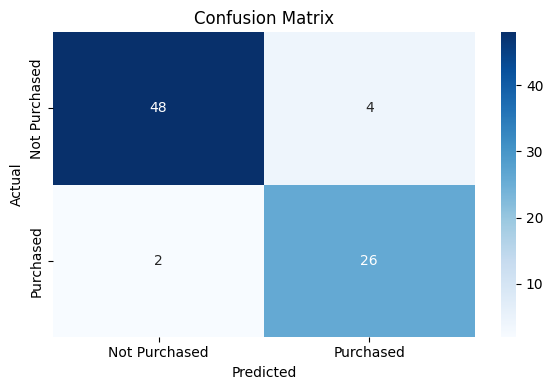

In [11]:
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Purchased", "Purchased"], yticklabels=["Not Purchased", "Purchased"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()



In [13]:
# Predict new input
print("\n--- Predict a New User ---")
gender_input = input("Gender (Male/Female): ").strip().lower()
gender_encoded = 1 if gender_input == 'male' else 0
age = float(input("Age: "))
salary = float(input("Estimated Salary: "))

user_input = np.array([[gender_encoded, age, salary]])
scaled_user_input = scaler.transform(user_input)
user_prediction = knn.predict(scaled_user_input)

print("Prediction:", "✅ Purchased" if user_prediction[0] == 1 else "❌ Not Purchased")


--- Predict a New User ---
Prediction: ✅ Purchased


c:\Users\priya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
